### Introdução ao Problema

O problema do caixeiro viajante (TSP) é encontrar o caminho de menor custo que visita um conjunto de \(n\) cidades exatamente uma vez e retorna à cidade inicial. Suponha que temos uma matriz de distâncias \(D\) onde \(D[i][j]\) representa a distância entre a cidade \(i\) e a cidade \(j\).

### Ideia Principal

A ideia principal do algoritmo Held-Karp é usar programação dinâmica para evitar recalcular subproblemas repetidos. Em vez de calcular todas as permutações possíveis das cidades (força bruta), armazenamos as soluções parciais para subconjuntos de cidades e as reutilizamos.

# INICIO DO ALGORITMO:

# Passo 1) Hyperparâmetros

- $n$: Número de cidades.
- $S \subseteq \{0, 1, 2, \ldots, n-1\}$: Um subconjunto de cidades.
- $|S|$: Número de elementos no subconjunto $S$.
- $C(S, j)$: Custo mínimo de visitar todas as cidades no subconjunto.
- $S$: terminando na cidade $j$.
- $R_\text{taxa}$: terminando na cidade $j$.

## Passo 2) Definir Subproblemas

Para cada subconjunto de cidades $S$ e para cada cidade $j$ em $S$, queremos calcular o custo mínimo $C(S, j)$.

$S$ definido como o conjunto de pontos dentro do raio concêntrico $R_\text{centr}$ com centro sendo o ponto de saída dos agentes.

Se não há nenhum ponto de visita dentro do raio inicial:
\begin{equation}
    R_\text{atual} \leftarrow R_\text{atual} \times R_\text{taxa}.
\end{equation}
Esse raio aumenta até ter um mínimo de 20 pontos dentro.

## Passo 3) Inicialização

Para o subconjunto com apenas a cidade inicial (cidade 0), o custo é zero:

$$
\begin{equation}
C(\{0\}, 0) = 0
\end{equation}
$$

Para todos os outros subconjuntos que não contêm a cidade inicial, o custo inicial é infinito:

$$
\begin{equation}
C(S, j) = \infty \quad \text{para todos } S \text{ que não contêm 0}
\end{equation}
$$

## Passo 4) Recursão

Para subconjuntos maiores, calculamos o custo mínimo adicionando a cidade $j$ ao custo mínimo de visitar todas as outras cidades no subconjunto $S$ menos $j$, terminando em alguma cidade $i$ que não seja $j$:

$$
\begin{equation}
C(S, j) = \min_{i \in S, i \neq j} \left[ C(S \setminus \{j\}, i) + D[i][j] \right]
\end{equation}
$$

## Passo 5) Combinação Final

O custo mínimo para visitar todas as cidades e retornar à cidade inicial é dado por:

$$
\begin{equation}
\text{Custo Mínimo} = \min_{j \neq 0} \left[ C(\{0, 1, \ldots, n-1\}, j) + D[j][0] \right]
\end{equation}
$$

## Passo 6) Repita os passos 2 até 6, até passar por todos os pontos de visitas disponíveis.

# FIM DO ALGORITMO:

### 0) Importação das Bibliotecas:

In [ ]:
import locale
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
### from prettytable import PrettyTable
from itertools import product
from math import sqrt
import random
import folium
from pyproj import Proj
### import gurobipy as gp
### from gurobipy import GRB
# importing googlemaps module
#import googlemaps
import pandas as pd
import geopy.distance as gd
import sys
import time
import os
import itertools

# Chamando o arquivo .py com as funções implementadas
import Modulo_exato

### 1) Carregamento dos bancos de dados:

In [ ]:
# Carregamento dos dados dos postos de saúde já tratados:
cab = ['Índice','Região','Endereço','CoordenadaXY','X','Y']
postos_data = pd.read_csv('../Banco_de_dados/postos_data.csv', sep=',', skiprows=1, names = cab)
postos_data.head()

,Índice,Região,Endereço,CoordenadaXY,X,Y
0,0,Centro,Rua Coronel José Monteiro 407 Centro,-23.181409264128344 -45.88413629003892,-45.884136,-23.181409
1,1,Centro,Avenida Anchieta 1069 Jardim Nova América,-23.19300408207269 -45.90407824956441,-45.904078,-23.193004
2,2,Centro,Rua Martins Pereira 263 Jardim Paulista,-23.190159425525938 -45.87033204771088,-45.870332,-23.190159
3,3,Centro,Rua São Pedro 55 Vila Maria,-23.17685304237057 -45.878886747711434,-45.878887,-23.176853
4,4,Leste,Rua Júlia Cursino 161 Americano,-23.179259398036233 -45.81191067654758,-45.811911,-23.179259


In [ ]:
# Carregamento dos dados dos postos de saúde já tratados:
cab = ['Índice', 'id', 'oms_id', 'Nome', 'loteamento', 'Região', 'X', 'Y']
publico_data = pd.read_csv('../Banco_de_dados/publico_data_clean.csv', sep=',', skiprows=1, names = cab)
publico_data.head()

,Índice,id,oms_id,Nome,loteamento,Região,X,Y
0,0,4641,136620525.0,Antenor Salles Villela (Estrada Principal),Aguas de Canindu,Norte,-45.899820,-23.133007
1,1,7801,326258616.0,Sem nome,Alto da Vila Paiva,Norte,-45.911497,-23.142434
2,2,4530,135885227.0,Jose de Alencar Araujo,Alto do Caete,Norte,-45.921024,-23.146000
3,3,4558,135888765.0,JosÃ© Pereira Filho,Altos da Ponte,Norte,-45.900061,-23.153031
4,4,4559,135888762.0,Anselmo Carnevalli,Altos da Ponte,Norte,-45.901770,-23.152832


In [ ]:
# Usando a função mapa_regiao para plot do mapa personalizado:

Modulo_exato.Region_map(postos_data,
                  publico_data,
                  postos_data.X,
                  postos_data.Y,
                  publico_data.X,
                  publico_data.Y,
                  regiao='Sudeste',
                  cor='red')

### 2) Funções auxiliares para o Held-Karp:

In [ ]:
# Automatização do calculo de distância entre coordenadas usando a biblioteca geopy:
def coord_dist(coord_1, coord_2):
    '''
    Função para calcular a distância entre dois pontos usando a geodésica

    input:
        latitude e longitude de dois pontos

    operação:
        lat1 + long1 = coordenada 1
        lat2 + long2 = coordenada 2
        dist geodesica (coordenada 1, coordenada 2)

    output:
        distância em Km entre as coordenadas 1 e 2
    '''

    return gd.geodesic(coord_1, coord_2).km

In [ ]:
def calcular_distancias(df, ponto_inicial, raio):
    distancias = []
    coordenadas = list(zip(df['Latitude'], df['Longitude']))
    for i, coord in enumerate(coordenadas):
        distancia = coord_dist(ponto_inicial, coord)
        if distancia <= raio:
            distancias.append((i, distancia))

    return distancias

### 3) Aplicação do otimizador Held-Karp:

In [ ]:
def held_karp(dists):
    n = len(dists)

    # Inicializar a tabela de custos mínimos
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Populando a tabela de custos mínimos usando programação dinâmica
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # Calculando o custo mínimo para retornar à cidade inicial
    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    # Reconstruir o caminho
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    path.append(0)
    return opt, list(reversed(path))

In [ ]:
import itertools

def held_karp(dists):
    n = len(dists)

    # Verificar se há menos de 2 coordenadas
    if n <= 1:
        print("Erro: O número de coordenadas deve ser maior que 1 para realizar a otimização.")
        return None, []

    # Inicializar a tabela de custos mínimos
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Populando a tabela de custos mínimos usando programação dinâmica
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # Calculando o custo mínimo para retornar à cidade inicial
    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))

    # Verificar se a lista res está vazia
    if not res:
        print("Erro: Não há caminho válido para otimização.")
        return None, []

    opt, parent = min(res)

    # Reconstruir o caminho
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    path.append(0)
    return opt, list(reversed(path))

### 4) Geração do caminho com os condicionais:

##### Obs: aqui ele é aplicado após a formação dos caminhos

In [ ]:
import random

def filtrar_coordenadas(coordenadas):
    """
    Função para filtrar coordenadas geográficas com uma chance de 20% de não visitar, exceto o primeiro par.

    Parâmetros:
    - coordenadas: lista de tuplas (ou listas) com as coordenadas geográficas (Latitude, Longitude).

    Retorna:
    - no_visit_coord: Lista de coordenadas não visitadas.
    - visit_coord: Lista de coordenadas visitadas.
    """
    no_visit_coord = []
    visit_coord = []

    # Garantir que o primeiro par de coordenadas seja sempre visitado
    visit_coord.append(coordenadas[0])

    # Iterar sobre as coordenadas, exceto a primeira
    for i in range(1, len(coordenadas)):
        # Aplicar probabilidade de 20% de "não visita"
        if random.random() < 0.2:
            no_visit_coord.append(coordenadas[i])
        else:
            visit_coord.append(coordenadas[i])

    return no_visit_coord, visit_coord


In [ ]:
import random

def filtrar_coordenadas(coordenadas):
    """
    Função para filtrar coordenadas geográficas com uma chance de 20% de não visitar, exceto o primeiro par.

    Parâmetros:
    - coordenadas: lista de tuplas (ou listas) com as coordenadas geográficas (Latitude, Longitude).

    Retorna:
    - no_visit_coord: Lista de coordenadas não visitadas.
    - visit_coord: Lista de coordenadas visitadas.
    """
    no_visit_coord = []
    visit_coord = []

    # Verificar se há apenas uma coordenada
    if len(coordenadas) == 1:
        # Se houver apenas uma, ela será visitada e não haverá locais não visitados
        visit_coord.append(coordenadas[0])
        return no_visit_coord, visit_coord

    # Garantir que o primeiro par de coordenadas seja sempre visitado
    visit_coord.append(coordenadas[0])

    # Iterar sobre as coordenadas, exceto a primeira
    for i in range(1, len(coordenadas)):
        # Aplicar probabilidade de 20% de "não visita"
        if random.random() < 0.2:
            no_visit_coord.append(coordenadas[i])
        else:
            visit_coord.append(coordenadas[i])

    return no_visit_coord, visit_coord


In [ ]:
def otimizador_held_karp_4(df, raio, max_locais=20, fator_aumento=0.1, veiculo='bike', max_time=5.5):
    """
    Função para otimização utilizando o algoritmo Held-Karp, considerando um limite de tempo total.

    Parâmetros:
    - df: DataFrame contendo as coordenadas das localidades (a primeira linha contém o ponto inicial).
    - raio: Raio inicial de busca.
    - max_locais: Número máximo de locais que o agente pode visitar.
    - fator_aumento: Fator de aumento do raio caso o número de locais dentro do raio seja insuficiente.
    - veiculo: Tipo de veículo utilizado (ex: 'bike' ou 'carro').
    - max_time: Tempo máximo permitido para o caminho.

    Retorna:
    - opt: Otimização realizada pelo algoritmo Held-Karp.
    - caminho_original: Lista de índices representando o caminho otimizado.
    - tempo_total: Tempo total gasto no caminho.
    """
    tempo_total = 0

    # Ponto inicial é a primeira linha do DataFrame
    ponto_inicial = (df.iloc[0]['Latitude'], df.iloc[0]['Longitude'])

    # Loop para ajustar o raio até que tenha no mínimo "max_locais" dentro do raio
    while True:
        # Calcular distâncias para todas as localidades dentro do raio de busca
        locais_no_raio = calcular_distancias(df, ponto_inicial, raio)

        # Se o número de locais no raio for suficiente, sair do loop
        if len(locais_no_raio) >= max_locais:
            break

        # Caso contrário, aumentar o raio por um fator de 0.1
        raio += raio * fator_aumento
        print(f'Novo raio: {raio}')

    # Filtrar os locais que estão dentro do limite de locais que o agente pode visitar
    locais_no_raio = sorted(locais_no_raio, key=lambda x: x[1])[:max_locais]

    # Extrair os índices das localidades selecionadas
    indices = [i for i, _ in locais_no_raio]

    # Montar a matriz de distâncias entre os locais selecionados
    n = len(indices)
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = coord_dist(
                (df.iloc[indices[i]]['Latitude'], df.iloc[indices[i]]['Longitude']),
                (df.iloc[indices[j]]['Latitude'], df.iloc[indices[j]]['Longitude'])
            )
            dists[i][j] = dist
            dists[j][i] = dist

    # Resolver o TSP com Held-Karp para os locais selecionados
    opt, caminho = held_karp(dists)

    # Converter o caminho para os índices originais do DataFrame
    caminho_original = [indices[i] for i in caminho]

    # Calcular o tempo total considerando o percurso do agente
    for k in range(1, len(caminho_original)):
        # Calcular a distância entre o ponto atual e o anterior
        dist = coord_dist(
            (df.iloc[caminho_original[k - 1]]['Latitude'], df.iloc[caminho_original[k - 1]]['Longitude']),
            (df.iloc[caminho_original[k]]['Latitude'], df.iloc[caminho_original[k]]['Longitude'])
        )

        # Calcular o tempo gasto para percorrer essa distância
        tempo = Modulo_exato.working_day_time(dist, veiculo)
        novo_tempo_total = tempo_total + tempo

        # Verificar se o tempo total excede o limite permitido
        if novo_tempo_total > max_time:
            print(f'Tempo máximo excedido: {novo_tempo_total}')
            break

        # Atualizar o tempo total
        tempo_total = novo_tempo_total

    return opt, caminho_original, tempo_total


In [ ]:
def otimizador_held_karp_5(df, raio, max_locais=20, fator_aumento=0.1, veiculo='bike', max_time=5.5):
    """
    Função para otimização utilizando o algoritmo Held-Karp, considerando um limite de tempo total.

    Parâmetros:
    - df: DataFrame contendo as coordenadas das localidades (a primeira linha contém o ponto inicial).
    - raio: Raio inicial de busca.
    - max_locais: Número máximo de locais que o agente pode visitar.
    - fator_aumento: Fator de aumento do raio caso o número de locais dentro do raio seja insuficiente.
    - veiculo: Tipo de veículo utilizado (ex: 'bike' ou 'carro').
    - max_time: Tempo máximo permitido para o caminho.

    Retorna:
    - opt: Otimização realizada pelo algoritmo Held-Karp.
    - caminho_original: Lista de índices representando o caminho otimizado.
    - tempo_total: Tempo total gasto no caminho.
    """
    tempo_total = 0

    # Ponto inicial é a primeira linha do DataFrame
    ponto_inicial = (df.iloc[0]['Latitude'], df.iloc[0]['Longitude'])

    # Loop para ajustar o raio até que tenha no mínimo "max_locais" dentro do raio
    while True:
        # Calcular distâncias para todas as localidades dentro do raio de busca
        locais_no_raio = calcular_distancias(df, ponto_inicial, raio)

        # Se o número de locais no raio for suficiente, sair do loop
        if len(locais_no_raio) >= max_locais:
            break

        # Caso contrário, aumentar o raio por um fator de 0.1
        raio += raio * fator_aumento
        print(f'Novo raio: {raio}')

    # Filtrar os locais que estão dentro do limite de locais que o agente pode visitar
    locais_no_raio = sorted(locais_no_raio, key=lambda x: x[1])[:max_locais]

    # Verificação de coordenadas suficientes
    if len(locais_no_raio) <= 1:
        print("Erro: Coordenadas insuficientes para realizar a otimização. Mínimo de 2 coordenadas é necessário.")
        return None, [], 0

    # Extrair os índices das localidades selecionadas
    indices = [i for i, _ in locais_no_raio]

    # Montar a matriz de distâncias entre os locais selecionados
    n = len(indices)
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = coord_dist(
                (df.iloc[indices[i]]['Latitude'], df.iloc[indices[i]]['Longitude']),
                (df.iloc[indices[j]]['Latitude'], df.iloc[indices[j]]['Longitude'])
            )
            dists[i][j] = dist
            dists[j][i] = dist

    # Resolver o TSP com Held-Karp para os locais selecionados
    opt, caminho = held_karp(dists)

    # Converter o caminho para os índices originais do DataFrame
    caminho_original = [indices[i] for i in caminho]

    # Calcular o tempo total considerando o percurso do agente
    for k in range(1, len(caminho_original)):
        # Calcular a distância entre o ponto atual e o anterior
        dist = coord_dist(
            (df.iloc[caminho_original[k - 1]]['Latitude'], df.iloc[caminho_original[k - 1]]['Longitude']),
            (df.iloc[caminho_original[k]]['Latitude'], df.iloc[caminho_original[k]]['Longitude'])
        )

        # Calcular o tempo gasto para percorrer essa distância
        tempo = Modulo_exato.working_day_time(dist, veiculo)
        novo_tempo_total = tempo_total + tempo

        # Verificar se o tempo total excede o limite permitido
        if novo_tempo_total > max_time:
            print(f'Tempo máximo excedido: {novo_tempo_total}')
            break

        # Atualizar o tempo total
        tempo_total = novo_tempo_total

    return opt, caminho_original, tempo_total


### 5) Super loop:

In [ ]:
# Cozinha?
#ponto_inicial = data['Latitude'][0], data['Longitude'][0]
raio = 0.2
ml = 20
v = 'bike'
regiao = 'Sul'

In [ ]:
# Gerando o "new_points" fora do loop para usar o len() para o "super_ite":
points = Modulo_exato.Region_data(postos_data, publico_data, n=0, regiao=regiao)
new_points = np.array([points['Latitude'][:], points['Longitude'][:]]).T

# Inicializa variáveis de controle
all_best_paths = []
all_paths_length = []
seq_coord = []
no_visited_coord = []
visited_coord = []
start_time = time.time()
super_ite = len(new_points) - 1

print('Inicio da geração de caminhos, quantidade de amostras:', super_ite)

mask_posto = postos_data['Região'] == regiao
mask_posto = postos_data[mask_posto]
print('quantidade de grupos:',len(mask_posto))
# Super loop:
while super_ite >= 2:
    ml_new = 0

    for i in range(0, len(mask_posto)): # ATENÇÃO: mudar aqui p/ cada região!!!
        points = Modulo_exato.Region_data(postos_data, publico_data, n=i, regiao=regiao)
        #print('points [0]:', points[0])
        ponto_inicial = points['Latitude'][0], points['Longitude'][0]
        print('ponto_inicial inicio:', ponto_inicial)

        # o ponto de partida está separado!!!
        df = points[['Latitude', 'Longitude']]#[1:]
        new_points = np.array([points['Latitude'], points['Longitude']]).T

        # Se houver coordenadas visitadas, remova-as de points
        if len(visited_coord) > 0:
            # Criar DataFrame com as coordenadas visitadas
            df_visited = pd.DataFrame(np.vstack(visited_coord), columns=['Latitude', 'Longitude'])

            # Remover coordenadas visitadas de points
            points = points[~points[['Latitude', 'Longitude']].apply(tuple, axis=1).isin(df_visited.apply(tuple, axis=1))]

        # Transforma DF em array para entrar em "otimizador_held_karp_2"
        df = points[['Latitude', 'Longitude']]
        new_points = np.array([points['Latitude'], points['Longitude']]).T

        print('len_new_points:', len(new_points)-1)
        print('len_df:', len(df)-1)

        #print('Quantidade de Coordenadas remanescentes (inicio):', len(new_points) - 1)

        if len(new_points) -1 < ml: ########
            ml_new = len(new_points) -1
            print('ml_new:', ml_new)
            path_length, best_path, tempo_total = otimizador_held_karp_5(df, raio, max_locais=ml_new, fator_aumento=0.1,
                                                                         veiculo='bike', max_time=5.5)
        else:
            path_length, best_path, tempo_total = otimizador_held_karp_5(df, raio, max_locais=ml, fator_aumento=0.1,
                                                                         veiculo='bike', max_time=5.5)

        #seq_coord.append(new_points[best_path])
        print(len(seq_coord))

        seq = new_points[best_path]
        seq_coord.append(seq)
        print('seq:', seq, 'posto:', i+1)

        # Talvez eu tenha que alterar isso, a saída não seria as coordenadas do
        no_visit_coord, visit_coord = filtrar_coordenadas(seq[1:])

        # adicionar o ponto de partida dos agentes no "visit_coord"

        print('no_visit_coord:', no_visit_coord)
        print('visit_coord:', visit_coord)

        all_best_paths.append(visit_coord)
        all_paths_length.append(path_length)
        visited_coord.append(visit_coord)
        no_visited_coord.append(no_visit_coord)
        print('len_visited:', len(visit_coord))
        print('len_no_visited:', len(no_visit_coord))

        #print('no visited coord', no_visited_coord)

        len_selec = len(visit_coord)
        super_ite -= len_selec
        print('Quantidade de Coordenadas remanescentes (final):', super_ite)

        # Verificação adicional: se super_ite for igual a 1, interrompe o while
        if super_ite == 1:
            print('Apenas uma coordenada restante, avançando para o próximo "n"')
            break  # Interrompe o for e passa para o próximo "n"

    if super_ite == 1:
        break  # Interrompe o while e passa para o próximo "n"

print(f'\nDuração total: {time.time() - start_time:.0f} segundos')


Inicio da geração de caminhos, quantidade de amostras: 1720
quantidade de grupos: 9
ponto_inicial inicio: (-23.250357701037547, -45.8870283053806)
len_new_points: 1720
len_df: 1720
Novo raio: 0.22000000000000003
Novo raio: 0.24200000000000005
Novo raio: 0.26620000000000005
Novo raio: 0.2928200000000001
Novo raio: 0.3221020000000001
Novo raio: 0.35431220000000013
0
seq: [[-23.2503577  -45.88702831]
 [-23.25004481 -45.88643959]
 [-23.24978866 -45.88701463]
 [-23.24917332 -45.88721584]
 [-23.24824809 -45.88631042]
 [-23.24845639 -45.88461094]
 [-23.25108731 -45.88416886]
 [-23.2510226  -45.88443236]
 [-23.25297935 -45.8866154 ]
 [-23.25313845 -45.8872323 ]
 [-23.25275579 -45.88781629]
 [-23.25288774 -45.88844278]
 [-23.25289666 -45.88846239]
 [-23.25148866 -45.88987047]
 [-23.25143419 -45.88991899]
 [-23.25139939 -45.88968415]
 [-23.25113092 -45.88924249]
 [-23.24985934 -45.88889192]
 [-23.24994428 -45.88824733]
 [-23.2499748  -45.88764147]] posto: 1
no_visit_coord: [array([-23.25275579, 

In [ ]:
len(seq_coord)

114

In [ ]:
# Verificação:

s = 0

for k in range(len(visited_coord)):
    s += len(visited_coord[k])

s

1719

In [ ]:
len(Modulo_exato.Region_data(postos_data, publico_data, n=1, regiao=regiao))

1721

### 6) Mapa com os caminhos:

In [ ]:
# Defina o caminho da pasta onde deseja salvar os arquivos
save_path = 'Mapa_Bike_HK_Sul'

# Verifique se a pasta existe, se não, crie-a
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Loop para automatização da geração dos mapas
for i in range(len(seq_coord)):
    # Crie o mapa com as coordenadas principais
    mapa = Modulo_exato.best_way(seq_coord[i])

    # Adicione as coordenadas da lista extra se existirem
    #if i < len(no_visit_coord):
    for coord in no_visited_coord[i]:
        folium.CircleMarker(
            location=coord,
            radius=5,
            fill=True,
            color="yellow",
            fill_color="yellow",
            fill_opacity=1
        ).add_to(mapa)

    # Salva o mapa gerado em um arquivo .html na pasta especificada
    mapa.save(os.path.join(save_path, f'mapa_{i+1}.html'))

### 7) Gráficos finais:

#### 7.1) Super loop para geração da porcentagem de cobertura:

In [ ]:
#for i in range(0, 2):
# Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
points = Modulo_exato.Region_data(postos_data, publico_data, n=0, regiao=regiao)

# Cria pasta para salvar os gráficos:
output_dir = 'Percentual_Bike_HK_Sul'
os.makedirs(output_dir, exist_ok=True)

num_pontos_inicial = len(points) - 2
len_selec = 0

for i in range(len(visited_coord)):
    amostras_adicionadas = len(visited_coord[i]) #- 1
    len_selec += amostras_adicionadas
    num_pontos_restantes = num_pontos_inicial - len_selec

    # Calcula porcentagem de cobertura:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagem_restante = 100 - porcentagem_coberta

    print('selec:', len_selec)
    print('rest:', num_pontos_restantes)
    print('iter:', i + 1)
    print('amostras adicionadas nesta iteração:', amostras_adicionadas)

    # Dados para o gráfico de pizza:
    labels = ['Publico alvo atendido', 'Publico alvo restante']
    sizes = [porcentagem_coberta, porcentagem_restante]

    # Cria uma figura com dois subplots lado a lado:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Ajusta o espaço entre os subplots:
    plt.subplots_adjust(wspace=0.5)  # Aumenta o espaço entre os gráficos

    # Gráfico de pizza:
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
    ax1.axis('equal')
    ax1.set_title(f'Porcentagem de cobertura na Iteração {i+1}')

    # Dados para o gráfico de barras:
    labels_barras = ['Publico alvo atendido', 'Publico alvo restante']
    quantidades = [len_selec, num_pontos_restantes]

    # Gráfico de barras:
    ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
    ax2.set_xlabel('Status')
    ax2.set_ylabel('Quantidade')
    ax2.set_ylim(0, 2000)  # Define o valor fixo do eixo y de 0 até 850
    for index, value in enumerate(quantidades):
        ax2.text(index, value + 10, str(value), ha='center')  # Adiciona rótulos com as quantidades acima das barras
    ax2.set_title(f' {amostras_adicionadas} pontos visitados até a Iteração {i+1}')

    # Salva a figura com ambos os gráficos:
    output_file = os.path.join(output_dir, f'charts_iter_{i+1}.png')
    plt.savefig(output_file)
    plt.close()

print('Gráficos salvos em:', output_dir)

selec: 15
rest: 1704
iter: 1
amostras adicionadas nesta iteração: 15
selec: 31
rest: 1688
iter: 2
amostras adicionadas nesta iteração: 16
selec: 45
rest: 1674
iter: 3
amostras adicionadas nesta iteração: 14
selec: 63
rest: 1656
iter: 4
amostras adicionadas nesta iteração: 18
selec: 78
rest: 1641
iter: 5
amostras adicionadas nesta iteração: 15
selec: 94
rest: 1625
iter: 6
amostras adicionadas nesta iteração: 16
selec: 111
rest: 1608
iter: 7
amostras adicionadas nesta iteração: 17
selec: 128
rest: 1591
iter: 8
amostras adicionadas nesta iteração: 17
selec: 142
rest: 1577
iter: 9
amostras adicionadas nesta iteração: 14
selec: 158
rest: 1561
iter: 10
amostras adicionadas nesta iteração: 16
selec: 173
rest: 1546
iter: 11
amostras adicionadas nesta iteração: 15
selec: 188
rest: 1531
iter: 12
amostras adicionadas nesta iteração: 15
selec: 204
rest: 1515
iter: 13
amostras adicionadas nesta iteração: 16
selec: 218
rest: 1501
iter: 14
amostras adicionadas nesta iteração: 14
selec: 234
rest: 1485

#### 7.2) Gráfico dos Km percorridos por dia:

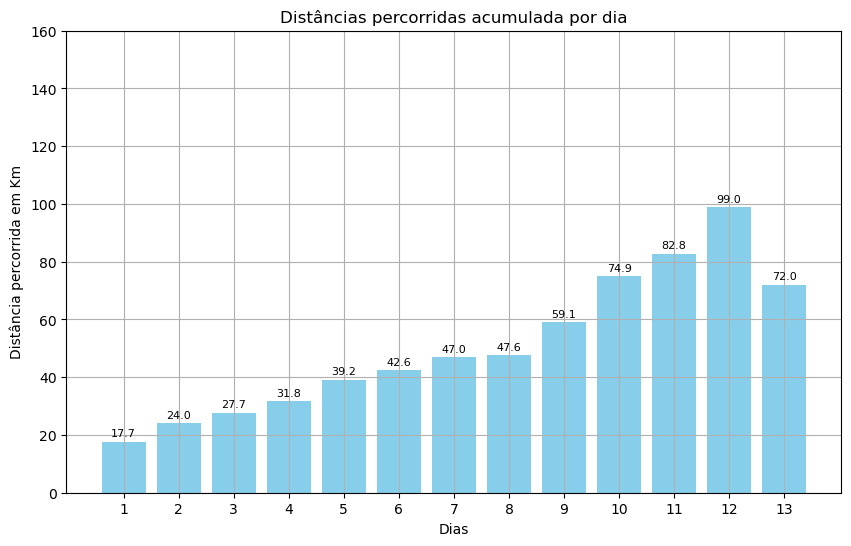

In [ ]:
distancias = all_paths_length
# Agrupar as distâncias a cada 4 registros para calcular a distância diária
distancias_diarias = [sum(distancias[i:i + 9]) for i in range(0, len(distancias), 9)]
#distancias_diarias = [sum(distancias[i:i + 8]) for i in range(0, len(distancias), 8)]  # para 2 agentes por posto!!!

# Criar lista de dias
dias = list(range(1, len(distancias_diarias) + 1))
#dias = list(range(1, len(distancias_diarias) + 1)) # para 2 agentes por posto!!!

# Plotar gráfico de barras verticais
plt.figure(figsize=(10, 6))
plt.bar(dias, distancias_diarias, color='skyblue')
#plt.ylim(0,70) ### # para 2 agentes por posto!!!
plt.ylim(0, 160)
plt.grid(True)

# Adicionar rótulos e título
plt.xlabel('Dias')
plt.ylabel('Distância percorrida em Km')
plt.title('Distâncias percorridas acumulada por dia')

# Adicionar rótulos nas barras com as quantidades de distâncias
for i, v in enumerate(distancias_diarias):
    plt.text(i + 1, v + 1, str(round(v,1)), ha='center', va='bottom', fontsize=8)
# Ajustar os rótulos do eixo x
plt.xticks(dias, labels=[str(dia) for dia in dias])
plt.savefig('Quilometragem_teste_Bike_HK_Sul.png')
# Mostrar gráfico
plt.show()


#### 7.3) gráfico de porcentagem de cobertura por dia por custo:

mask_posto = postos_data['Região'] == regiao
mask_posto = postos_data[mask_posto]
print(len(mask_posto))

# Supondo que Modulo.Region_data já está definido
points = Modulo_exato.Region_data(postos_data, publico_data, n=0, regiao='Oeste')

num_pontos_inicial = len(points) - 2
len_selec = 0

# Listas para armazenar os dados para o gráfico de barras
porcentagens_cobertas = []
custos = []
dias = []

# Constante de custo por agente
custo_por_agente = 1000
custo_por_posto = custo_por_agente  ### *2 p/ dois agentes

# Soma para porcentagem final
soma_porcentagem_restante = 0
num_iteracoes_adicionadas = 0

for i in range(len(visited_coord)):
    amostras_adicionadas = len(visited_coord[i]) #- 1
    len_selec += amostras_adicionadas
    num_pontos_restantes = num_pontos_inicial - len_selec
    
    # Calcula porcentagem de cobertura:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagem_restante = 100 - porcentagem_coberta
    
    # Calcula o custo total até a iteração atual
    custo_total = (i + 1) * custo_por_posto
    
    # Armazena os dados para o gráfico de barras a cada 4 iterações
    if (i + 1) % len(mask_posto) == 0:
    #if (i + 1) % 8 == 0: ##Para 2 agentes por posto!!!
        porcentagens_cobertas.append(porcentagem_coberta)
        custos.append(custo_total)
        dias.append((i + 1) // 2)
        #dias.append((i + 1) // 8) ###Para 2 agentes por posto!!!
        soma_porcentagem_restante = 0
        num_iteracoes_adicionadas = 0
    else:
        # Acumula a porcentagem restante para somar no final, se necessário
        soma_porcentagem_restante += porcentagem_restante
        num_iteracoes_adicionadas += 1

# Se houver iterações restantes que não foram incluídas na última barra
if num_iteracoes_adicionadas > 0:
    print('extra')
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagens_cobertas.append(porcentagem_coberta)
    custos.append(custo_total)
    dias.append((len(visited_coord))) #+3) // 2)
    #dias.append((len(seq_coord) + 1) // 7) ### Para 2 agentes por posto!!!

dias = list(range(1, len(porcentagens_cobertas) + 1))
# Cria uma figura para o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Cria o gráfico de barras para porcentagem coberta e restante
width = 0.8  # Largura das barras
x = np.arange(len(dias))  # Posições das barras no eixo x

# Barras para porcentagem coberta
bars_cobertas = ax1.bar(x - width+0.8, porcentagens_cobertas, width, label='Coberta', color='skyblue')
# Adiciona rótulos e título
ax1.set_xlabel('Dias')
ax1.set_ylabel('Porcentagem (%)')
ax1.set_title('Porcentagem de Cobertura e Custo por dia')
ax1.set_xticks(x)
ax1.set_xticklabels(dias)

ax1.set_ylim(0, 105)  # Define o valor fixo do eixo y de 0 até 100
ax1.grid(axis='x')
plt.grid(True)

# Adiciona rótulos com as porcentagens acima das barras
for bar in bars_cobertas:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Cria um segundo eixo y compartilhado com o primeiro eixo x
ax2 = ax1.twinx()

# Adiciona o gráfico de linha para os custos
ax2.plot(x, custos, color='red', marker='o', label='Custo')
ax2.set_ylabel('Custo (R$)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.label.set_color('red')  # Define a cor do rótulo do eixo y secundário como vermelho
#ax2.spines['right'].set_color('red')  # Define a cor da borda direita (eixo y secundário) como vermelho

plt.savefig('Porcentagem_dia_custo_Bike_HK_Oeste.png')
plt.show()


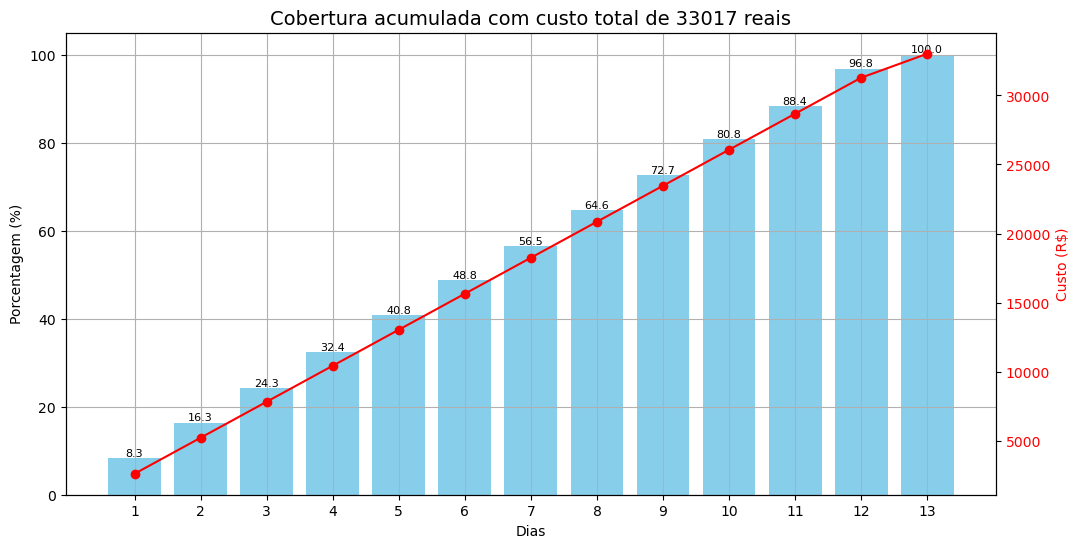

In [ ]:
# Supondo que Modulo.Region_data já está definido
points = Modulo_exato.Region_data(postos_data, publico_data, n=0, regiao=regiao)

num_pontos_inicial = len(points) -2
len_selec = 0

# Listas para armazenar os dados para o gráfico de barras
porcentagens_cobertas = []
custos = []
dias = []

# Constante de custo por agente
custo_por_agente = 289.63
custo_por_posto = custo_por_agente #* 2 ### *2 p/ dois agentes

# Soma para porcentagem final
soma_porcentagem_restante = 0
num_iteracoes_adicionadas = 0

for i in range(len(visited_coord)):
    amostras_adicionadas = len(visited_coord[i])
    len_selec += amostras_adicionadas
    num_pontos_restantes = num_pontos_inicial - len_selec

    # Calcula porcentagem de cobertura:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagem_restante = 100 - porcentagem_coberta

    # Calcula o custo total até a iteração atual
    custo_total = (i + 1) * custo_por_posto

    # Armazena os dados para o gráfico de barras a cada 4 iterações
    if (i + 1) % 9 == 0:
    #if (i + 1) % 8 == 0: ##Para 2 agentes por posto!!!
        porcentagens_cobertas.append(porcentagem_coberta)
        custos.append(custo_total)
        dias.append((i + 1) // 9)
        #dias.append((i + 1) // 8) ###Para 2 agentes por posto!!!
        soma_porcentagem_restante = 0
        num_iteracoes_adicionadas = 0
    else:
        # Acumula a porcentagem restante para somar no final, se necessário
        soma_porcentagem_restante += porcentagem_restante
        num_iteracoes_adicionadas += 1

# Se houver iterações restantes que não foram incluídas na última barra
if num_iteracoes_adicionadas > 0:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagens_cobertas.append(porcentagem_coberta)
    custos.append(custo_total)
    dias.append((len(visited_coord) + 8) // 9)
    #dias.append((len(seq_coord) + 1) // 7) ### Para 2 agentes por posto!!!

# Cria uma figura para o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Cria o gráfico de barras para porcentagem coberta e restante
width = 0.8  # Largura das barras
x = np.arange(len(dias))  # Posições das barras no eixo x

# Barras para porcentagem coberta
bars_cobertas = ax1.bar(x - width+0.8, porcentagens_cobertas, width, label='Coberta', color='skyblue')
# Adiciona rótulos e título
ax1.set_xlabel('Dias')
ax1.set_ylabel('Porcentagem (%)')
ax1.set_title(f'Cobertura acumulada com custo total de {int(custo_total)} reais', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(dias)

ax1.set_ylim(0, 105)  # Define o valor fixo do eixo y de 0 até 100
ax1.grid(axis='x')
plt.grid(True)

# Adiciona rótulos com as porcentagens acima das barras
for bar in bars_cobertas:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Cria um segundo eixo y compartilhado com o primeiro eixo x
ax2 = ax1.twinx()

# Adiciona o gráfico de linha para os custos
ax2.plot(x, custos, color='red', marker='o', label='Custo')
ax2.set_ylabel('Custo (R$)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.label.set_color('red')  # Define a cor do rótulo do eixo y secundário como vermelho
#ax2.spines['right'].set_color('red')  # Define a cor da borda direita (eixo y secundário) como vermelho

plt.savefig('Porcentagem_dia_custo_Bike_HK_Sul.png')
plt.show()

### FIM

### Devaneios:

### Entendi. Dado o cenário em que um agente de saúde visita entre 20 e 30 locais por dia, é possível utilizar métodos exatos em uma abordagem por partes, dividindo o problema em subconjuntos menores que possam ser resolvidos dentro do limite de tempo disponível. Esse tipo de abordagem é conhecido como "dividir para conquistar" ou "windowing".

#### Aqui está como você pode proceder:

##### Divisão em Subconjuntos: Divida o problema de 800 locais em subproblemas de 20 a 30 locais, que podem ser tratados como viagens diárias.

##### Aplicação de Métodos Exatos: Use um método exato como o algoritmo de Held-Karp para cada subproblema de 20 a 30 locais.

##### Combinação de Resultados: Combine os resultados diários para obter uma solução global.

##### Divisão em Subconjuntos: Uma maneira de dividir os locais pode ser com base em proximidade geográfica, ou agrupamentos, de modo que cada conjunto diário de visitas esteja razoavelmente próximo um do outro. Isso pode ser feito usando técnicas de clustering, como o algoritmo k-means.


##### Obs: O algoritmo Held-Karp (algoritmo de programação dinâmica para o TSP) ainda requer uma matriz de distâncias como entrada, mas ele é mais eficiente que a força bruta porque evita recalcular subproblemas já resolvidos. Em vez de avaliar todas as permutações possíveis das cidades (que seria a abordagem de força bruta), ele armazena soluções parciais e as reutiliza, reduzindo assim a quantidade de cálculos necessários.

### Sim, usar um raio de busca para limitar os locais de visita é uma abordagem válida e eficiente para reduzir o problema a subproblemas menores, especialmente em cenários com grande número de pontos como o seu, com 800 cidades. Essa técnica pode ser chamada de "windowing" ou "local search".

#### Abordagem Geral

##### Definir o Raio de Busca: Escolher um ponto inicial e definir um raio de busca a partir desse ponto. Somente os pontos dentro desse raio serão considerados para a visita.

##### Calcular a Matriz de Distâncias Local: Construir a matriz de distâncias apenas para os pontos dentro do raio.

##### Resolver o Subproblema: Aplicar o algoritmo Held-Karp (ou outro método exato) para resolver o subproblema restrito aos pontos dentro do raio.

##### Repetir o Processo: Escolher um novo ponto de partida e repetir o processo até que todos os pontos tenham sido visitados.

#### A seguir, apresento uma implementação dessa abordagem em Python, usando um exemplo com coordenadas geográficas: